### IMPORTING THE LIBRARIES

In [1]:
import tensorflow as tf
import librosa
import os
import numpy as np

### SETTING THE PATHS

In [2]:
TFLite_model = 'subword-conformer.latest_for_english.tflite'
audio = 'Trial2.flac'

### GETTING THE SIGNALS

In [3]:
signal, _ = librosa.load(os.path.expanduser(audio), sr=16000, mono=True)

### BUILDING THE MODEL

In [4]:
interpreter = tf.lite.Interpreter(model_path=TFLite_model)
interpreter.allocate_tensors()

input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [5]:
interpreter.resize_tensor_input(input_details[0]["index"], signal.shape)
interpreter.allocate_tensors()
interpreter.set_tensor(input_details[0]["index"], signal)
interpreter.set_tensor(
    input_details[1]["index"],
    np.array(0).astype('int32')
)
interpreter.set_tensor(
    input_details[2]["index"],
    np.zeros([1,2,1,320]).astype('float32')
)
interpreter.invoke()
hyp = interpreter.get_tensor(output_details[0]["index"])
print("FOLLOWING ARE THE SUBTITLES : ")
print("".join([chr(u) for u in hyp]))

FOLLOWING ARE THE SUBTITLES : 
    very    it  self    as  a   mer ry  we  ak  er  word    ca  use it  do  es  n   '   t   at  any ex  tra     sen se  this    is  a   very    good    cla ss  this    is  a   very    dre ss  how can we  rep la  ce  it  is  ins an  e   very    good    even    sa  ys  sp  le  nd  id      it  '   s   great   it  '   s   tru e   vi  sit     you say it  '   s   li  st  the forty   was lit     you gra te  ful acc ide nt  this    no  bod y   is  bri ll  ia  nt  this    is  a   wo  nde r   ful jo  b       and when    i   wal k   ou  t   side    and ki  ll  to  all sa  ve  here    tal king    to  and i   '   m   ti  red of  this    p   rai se  m   ys  elf i   dis heard   all dar y   a   i   can als o   use the word    mu  r   mu  r   i   can als o   say your    do  g   as  lo  ud  l   y   


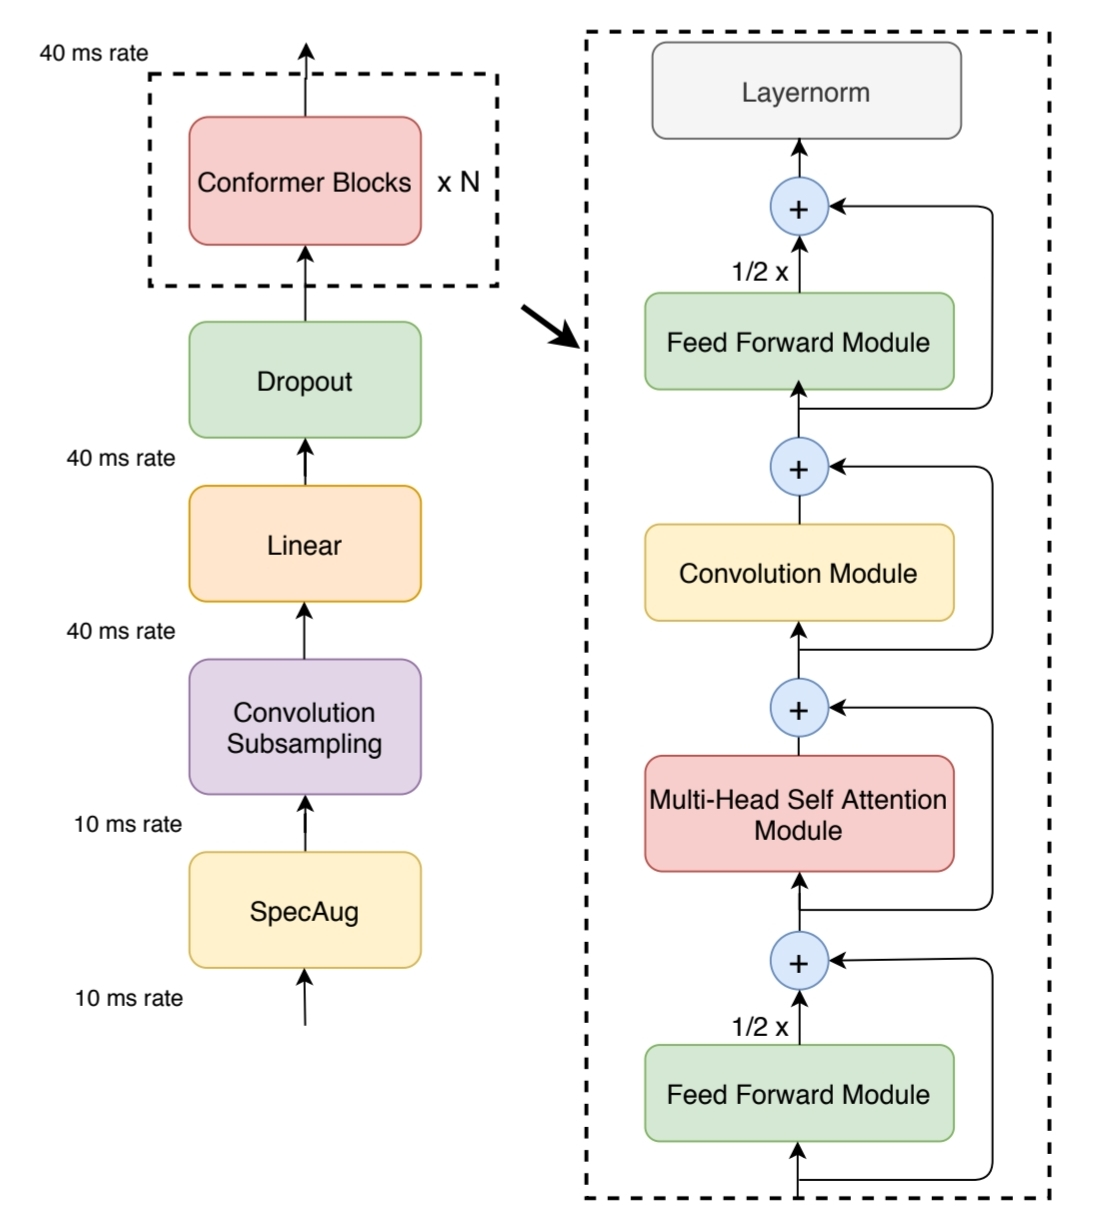